# Project 2 - Part 4: Choose your own advecnture! (7 Points; Optional for Extra Credit)



Reference:

- Topic evolution over time - see https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html#visualization 


In [14]:
####################
## CALL THIS BLOCK FROM part00_utils_visuals.py
####################

from bertopic import BERTopic

# read in SOTU.csv using pandas, name the variable `sou` for simplicity
# the below cell is what the output should look like

from src import part00_utils_visuals as part00
# import src.part00_utils_visuals as part00

from src import part01

part00.plot_style(style=part00.PLOT_STYLE_SEABORN)


sou        = part00.pd.read_csv(part00.DIR_DATA_00_RAW / part00.CSV_SOTU)
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


In [21]:
timestamps = sou.Year.to_list()
timestamps;

In [37]:
####################
## MOVE THIS BLOCK TO part03.py
####################

####################
## CALL THIS BLOCK TO part03.py
####################

import spacy
from tqdm import tqdm
from collections import Counter

spacy.cli.download("en_core_web_sm")

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.0 MB/s  0:00:00m0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [41]:
### Block Output
# 0      [speak, president, present, prepared, remark, ...
# 1      [president, speaker, point, president, turn, f...
# 2      [president, thank, thank, thank, madam, speake...
# 3      [president, thank, thank, thank, good, mitch, ...
# 4      [president, thank, thank, thank, madam, speake...
###

# Process all texts - note this takes ~ 5 minutes to run
# processed_docs = sou['Text'].apply(preprocess_text)

from tqdm.auto import tqdm
tqdm.pandas()  # registers .progress_apply()

docs       = sou.Text.progress_apply(preprocess_text) #.to_list()

  0%|          | 0/246 [00:00<?, ?it/s]

In [76]:
docs

0      [speak, president, present, prepared, remark, ...
1      [president, speaker, point, president, turn, f...
2      [president, thank, thank, thank, madam, speake...
3      [president, thank, thank, thank, good, mitch, ...
4      [president, thank, thank, thank, madam, speake...
                             ...                        
241    [fellow, citizen, senate, house, representativ...
242    [fellow, citizen, senate, house, representativ...
243    [fellow, citizen, senate, house, representativ...
244    [fellow, citizen, senate, house, representativ...
245    [fellow, citizen, senate, house, representativ...
Name: Text, Length: 246, dtype: object

In [48]:
### Block Output
# 0      [speak, president, present, prepared, remark, ...
# 1      [president, speaker, point, president, turn, f...
# 2      [president, thank, thank, thank, madam, speake...
# 3      [president, thank, thank, thank, good, mitch, ...
# 4      [president, thank, thank, thank, madam, speake...
###


docs_from_part03_csv = part00.DIR_DATA_03_LDA_BERT / "step00_processed_docs.csv"

import ast

docs_from_part03_csv = part00.pd.read_csv(part00.DIR_DATA_03_LDA_BERT / "step00_processed_docs.csv")
docs_from_part03_csv = docs_from_part03_csv.Text
# docs_from_part03_csv = docs_from_part03_csv.apply(ast.literal_eval)
docs_from_part03_csv

0      ['speak', 'president', 'present', 'prepared', ...
1      ['president', 'speaker', 'point', 'president',...
2      ['president', 'thank', 'thank', 'thank', 'mada...
3      ['president', 'thank', 'thank', 'thank', 'good...
4      ['president', 'thank', 'thank', 'thank', 'mada...
                             ...                        
241    ['fellow', 'citizen', 'senate', 'house', 'repr...
242    ['fellow', 'citizen', 'senate', 'house', 'repr...
243    ['fellow', 'citizen', 'senate', 'house', 'repr...
244    ['fellow', 'citizen', 'senate', 'house', 'repr...
245    ['fellow', 'citizen', 'senate', 'house', 'repr...
Name: Text, Length: 246, dtype: object

## Topic evolution over time 
**Reference:**
- https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html#visualization

In [81]:
# train the model - this takes about 30 seconds
MIN_TOPIC_SIZE = 3
IS_VERBOSE = True

step07_topic_model    = BERTopic(min_topic_size=MIN_TOPIC_SIZE, verbose=IS_VERBOSE)
# topics, probabilities = step07_topic_model.fit_transform(docs)
topics, probabilities = step07_topic_model.fit_transform(docs_from_part03_csv.to_list())
topics, probabilities;

2025-11-26 04:14:52,802 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

2025-11-26 04:15:04,033 - BERTopic - Embedding - Completed ✓
2025-11-26 04:15:04,034 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-26 04:15:04,381 - BERTopic - Dimensionality - Completed ✓
2025-11-26 04:15:04,382 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-26 04:15:04,393 - BERTopic - Cluster - Completed ✓
2025-11-26 04:15:04,396 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-26 04:15:05,424 - BERTopic - Representation - Completed ✓


In [82]:
NR_BINS      = 15
TOP_N_TOPICS = 10

###
# help(step07_topic_model.topics_over_time)
###

# topics_over_time(
#     docs: List[str],
#     timestamps: Union[List[str], List[int]],
#     topics: List[int] = None,
#     nr_bins: int = None,
#     datetime_format: str = None,
#     evolution_tuning: bool = True,
#     global_tuning: bool = True
# ) -> pandas.core.frame.DataFrame method of bertopic._bertopic.BERTopic instance
#     Create topics over time.


topics_over_time = step07_topic_model.topics_over_time(docs_from_part03_csv, timestamps, nr_bins=NR_BINS)
topics_over_time

15it [00:01,  8.77it/s]


,Topic,Words,Frequency,Timestamp
0,-1,"gentleman, united, states, public, great",1,1789.766
1,2,"states, united, government, citizen, country",6,1789.766
2,3,"states, public, government, great, shall",3,1789.766
3,4,"congress, interest, country, debt, government",1,1789.766
4,8,"provision, united, states, public, object",6,1789.766
...,...,...,...,...
68,0,"year, america, world, nation, people",17,1961.600
69,0,"america, world, year, people, american",18,1977.200
70,7,"program, administration, year, policy, us",1,1977.200
71,0,"america, year, people, work, child",16,1992.800


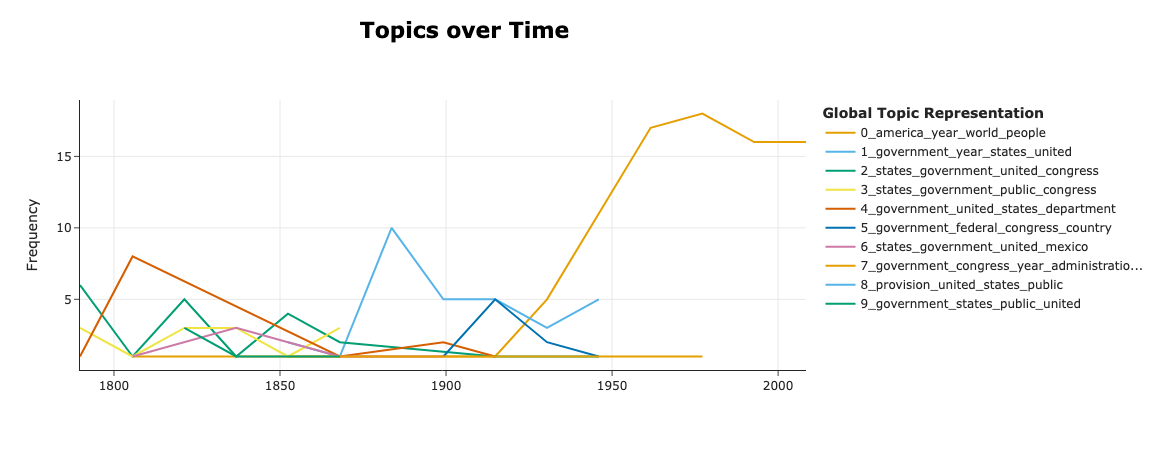

In [83]:
TOP_N_TOPICS = 10

step07_topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=TOP_N_TOPICS)